In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model, load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
def ClassLabel(i):
    if i == 0:
        return 'person'
    elif i == 1:
        return 'dog'
    elif i == 2:
        return 'airplane'
    elif i == 3:
        return 'cat'
    elif i == 4:
        return 'flower'
    elif i == 5:
        return 'car'
    elif i == 6:
        return 'fruit'
    elif i == 7:
        return 'motorbike'

In [3]:
X = []
Y = []


for i in range(1,3993):
    img = Image.open('All/'+str(i)+'.jpg')
    data = np.asarray( img, dtype="int32" ) / 255
    
    X.append(data)

    if i < 500:
        Y.append(0) #person

    elif i >= 500 and i < 999:
        Y.append(1) #dog

    elif i >= 999 and i < 1498:
        Y.append(2) #airplane

    elif i >= 1498 and i < 1997:
        Y.append(3) #cat

    elif i >= 1997 and i < 2496:
        Y.append(4) #flower

    elif i >= 2496 and i < 2995:
        Y.append(5) #car

    elif i >= 2995 and i < 3494:
        Y.append(6) #fruit

    elif i >= 3494:
        Y.append(7) #motorbike

In [4]:
X_train_original, X_test_original, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
X_train_original = np.asarray(X_train_original)
X_test_original = np.asarray(X_test_original)

label_encoder = LabelEncoder()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
input_img = Input(shape=(128,128,3,))
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(4, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(4, (3, 3), activation='relu', padding='same')(pool2)

dense1 = Flatten()(conv3)
dense2 = Dense(512)(dense1)
dense3 = Dense(32)(dense2)

preds = Dense(8, activation='sigmoid', name='final')(dense3)

Classificador_original = Model(input_img,preds)

Classificador_original.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
Classificador_original.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 4)         148       
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [8]:
h = Classificador_original.fit(X_train_original, y_train,
                epochs=12,
                batch_size=64,
                shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/12
3193/3193 [==============================] - 25s 8ms/step - loss: 1.7145 - acc: 0.4109
Epoch 2/12
3193/3193 [==============================] - 24s 8ms/step - loss: 1.0006 - acc: 0.6671
Epoch 3/12
3193/3193 [==============================] - 24s 8ms/step - loss: 0.7187 - acc: 0.7491
Epoch 4/12
3193/3193 [==============================] - 26s 8ms/step - loss: 0.5188 - acc: 0.8111
Epoch 5/12
3193/3193 [==============================] - 26s 8ms/step - loss: 0.4405 - acc: 0.8321
Epoch 6/12
3193/3193 [==============================] - 26s 8ms/step - loss: 0.3386 - acc: 0.8669
Epoch 7/12
3193/3193 [==============================] - 26s 8ms/step - loss: 0.3082 - acc: 0.8901
Epoch 8/12
3193/3193 [==============================] - 26s 8ms/step - loss: 0.2426 - acc: 0.9079
Epoch 9/12
3193/3193 [==============================] - 26s 8ms/step - loss: 0.2187 - acc: 0.9148
Epoch 10/12
3193/3193 [==============================] - 26s 8ms/step 

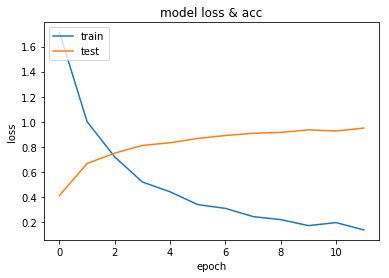

In [9]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['acc'])
plt.title('model loss & acc')
plt.ylabel('loss & acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
acc = Classificador_original.evaluate(X_test_original,y_test)

799/799 [==============================] - 4s 5ms/step


In [11]:
acc

[0.531335699804435, 0.8310387987219198]

In [12]:
X_Predicted = Classificador_original.predict(X_test_original)

airplane


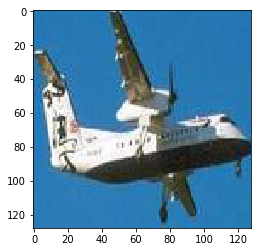

flower


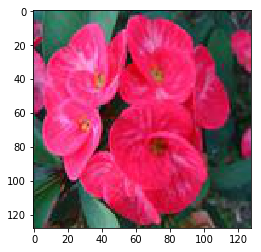

car


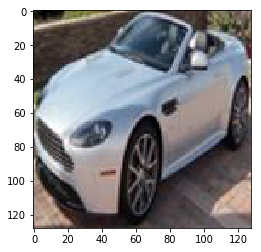

flower


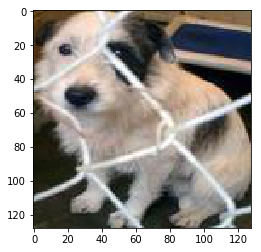

dog


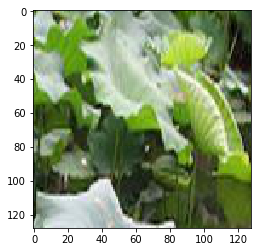

person


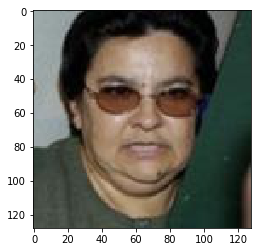

flower


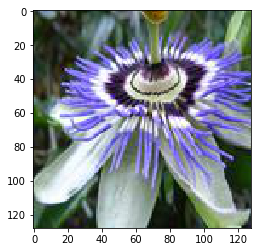

cat


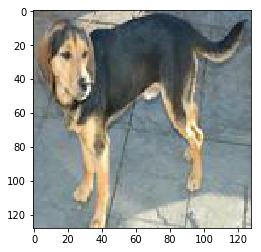

flower


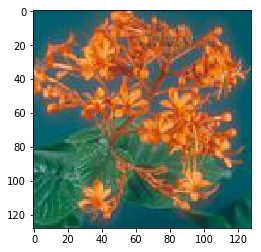

airplane


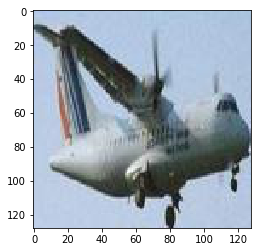

fruit


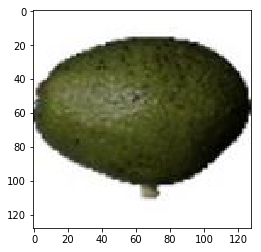

fruit


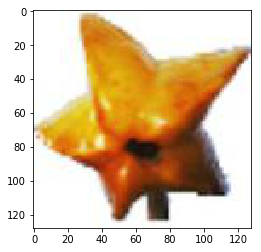

flower


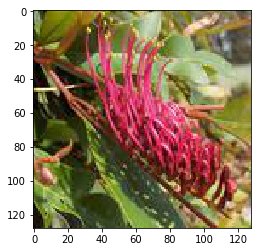

car


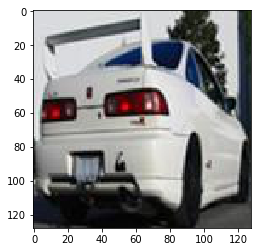

airplane


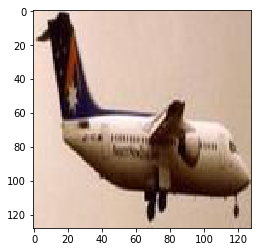

person


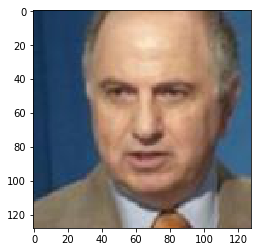

dog


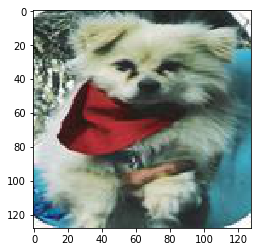

airplane


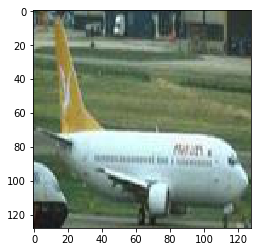

cat


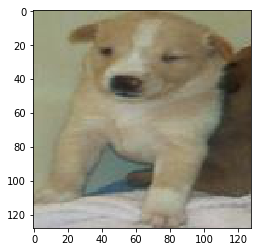

airplane


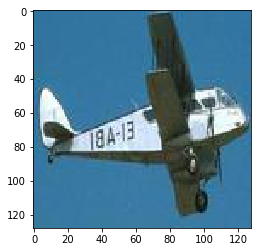

motorbike


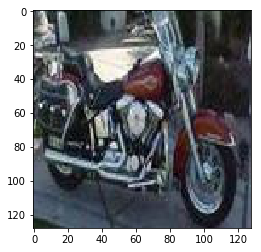

airplane


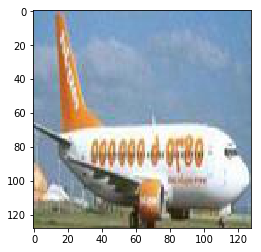

airplane


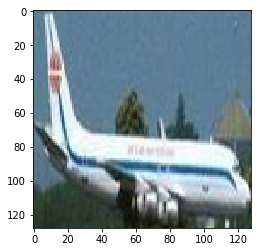

airplane


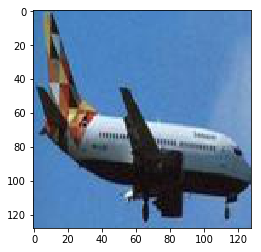

airplane


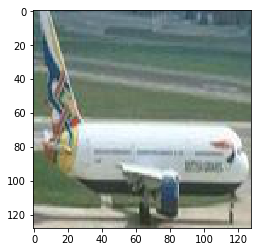

fruit


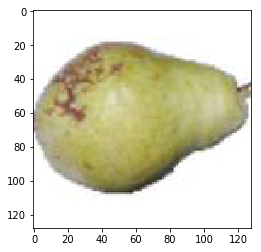

flower


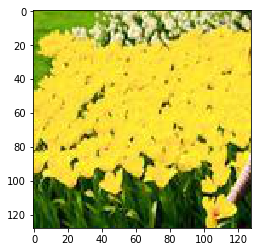

fruit


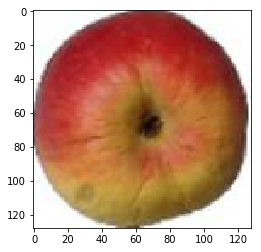

cat


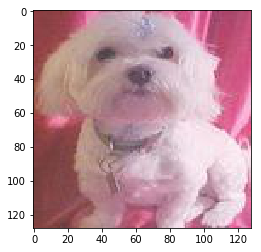

cat


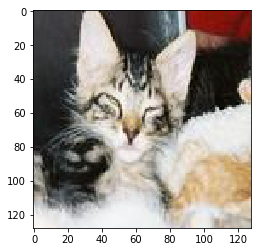

In [13]:
for i in range(30):
    #Original
    print(ClassLabel(np.argmax(X_Predicted[i])))
    f = X_test_original[i]
    plt.imshow(f, interpolation='nearest')
    plt.show()
#     #encoded
#     f = np.reshape(Xtr[i],(32,32,3))
#     plt.imshow(f, interpolation='nearest')
#     plt.show()
#     #autoencoded
#     f = np.reshape(X_auto[i],(128,128,3))
#     plt.imshow(f, interpolation='nearest')
#     plt.show()